# Getting started with calibrated-explanations
Author: Tuwe Löfström (tuwe.lofstrom@ju.se)  
Copyright 2023 Tuwe Löfström  
License: BSD 3 clause
## Classification
Let us illustrate how we may use `calibrated_explanations` to generate explanations from a classifier trained on a dataset from
[www.openml.org](https://www.openml.org), which we first split into a
training and a test set using `train_test_split` from
[sklearn](https://scikit-learn.org), and then further split the
training set into a proper training set and a calibration set:

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml(name="wine", version=7, as_frame=True)

X = dataset.data.values.astype(float)
y = (dataset.target.values == 'True').astype(int)

feature_names = dataset.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2,stratify=y)

X_prop_train, X_cal, y_prop_train, y_cal = train_test_split(X_train, y_train,
                                                            test_size=0.25)


We now fit a model on our data. 

In [2]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X_prop_train, y_prop_train)

RandomForestClassifier(n_jobs=-1)

Let us explain a test instance using the `calibrated_explanations`.

In [3]:
from calibrated_explanations import CalibratedExplainer, __version__
print(__version__)

explainer = CalibratedExplainer(rf, X_cal, y_cal, feature_names=feature_names)

factual_explanations = explainer.explain_factual(X_test)

display(explainer)

c:\Users\loftuw\Anaconda3\envs\cp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


v0.0.14b2


CalibratedExplainer:
	                mode=classification
	                discretizer=<class 'calibrated_explanations._discretizers.BinaryEntropyDiscretizer'>
	                model=RandomForestClassifier(n_jobs=-1)

Once we have the explanations, we can plot them using `plot_regular` or `plot_uncertainty`

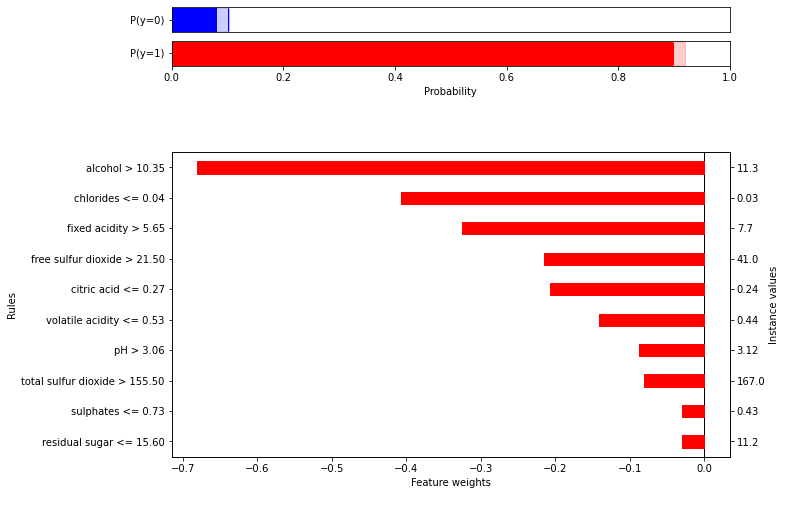

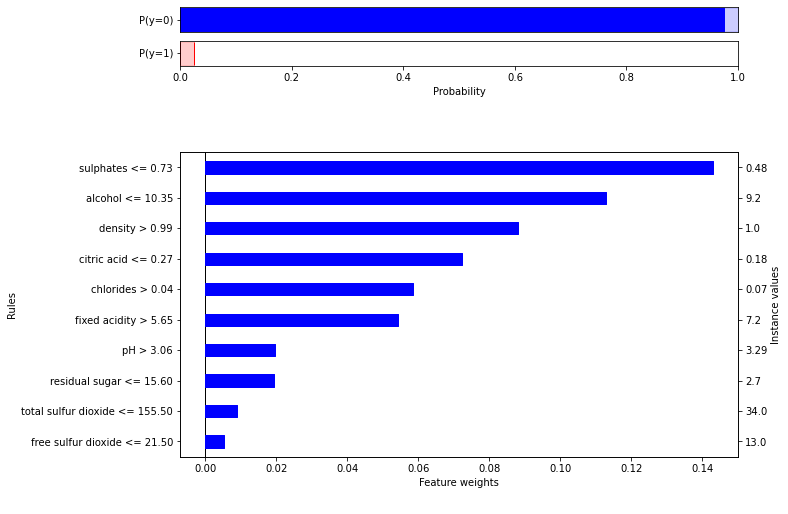

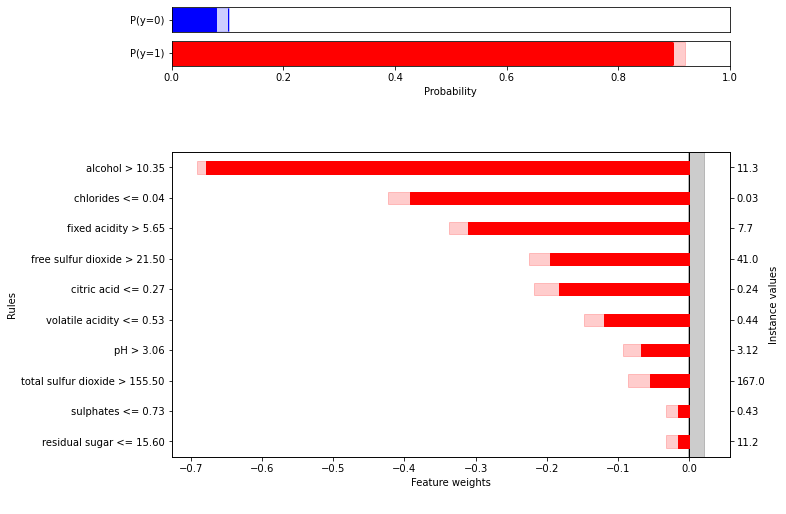

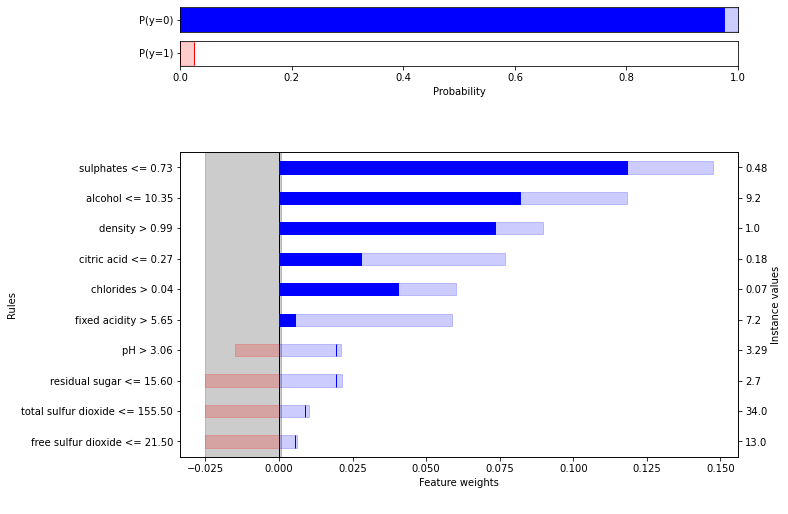

In [4]:
factual_explanations.plot_regular()
factual_explanations.plot_uncertainty()

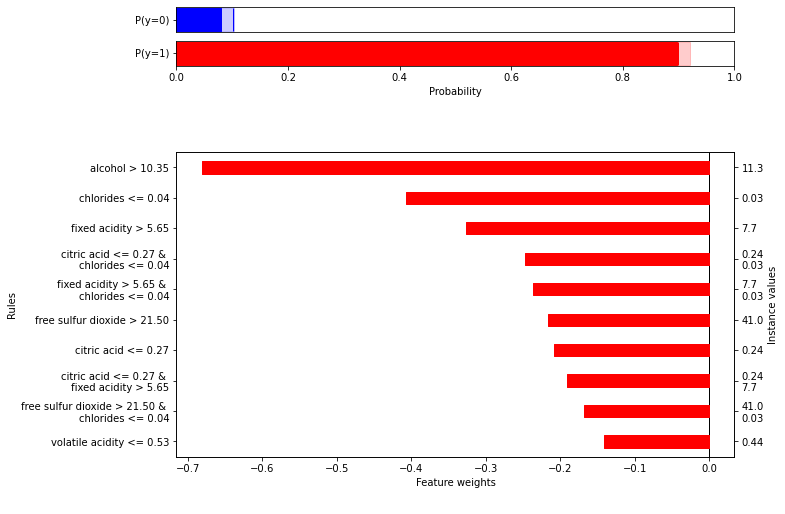

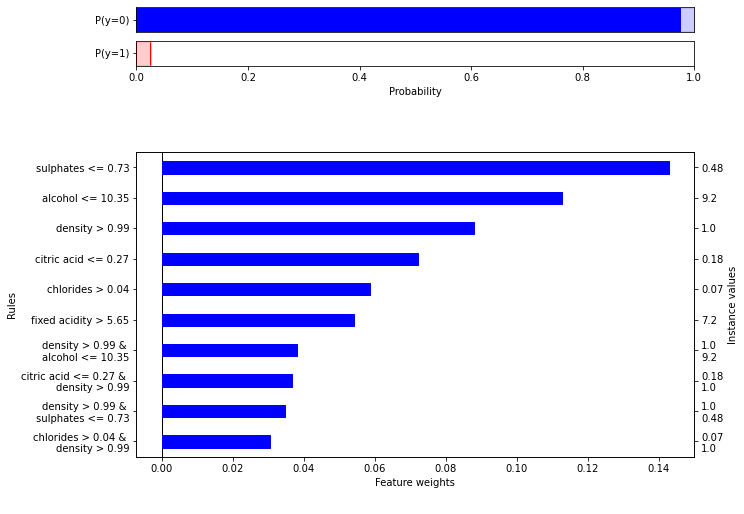

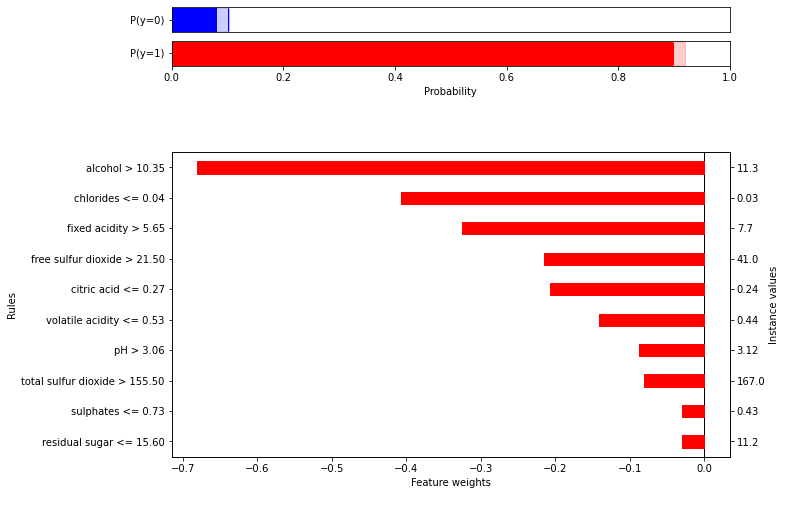

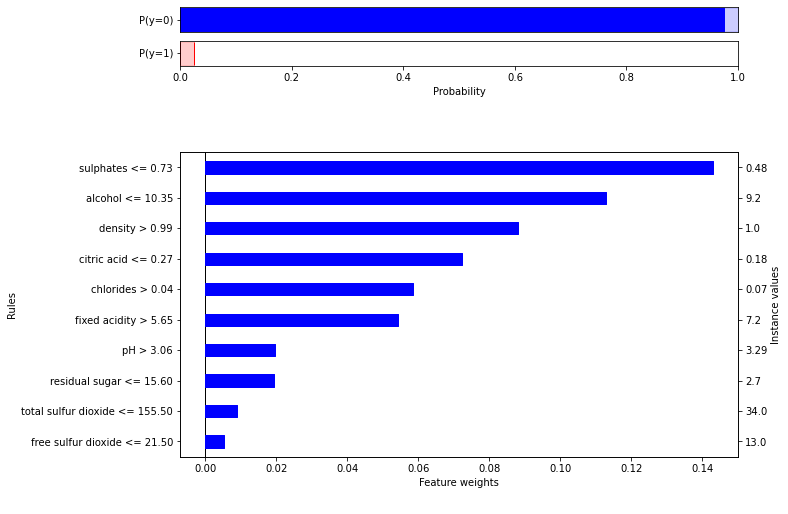

In [5]:

factual_explanations.add_conjunctive_factual_rules().plot_regular()
factual_explanations.remove_conjunctive_rules().plot_regular()

An alternative to factual rules is to extract counterfactual rules. 
`explain_counterfactual` can be called to get counterfactual rules with an appropriate discretizer automatically assigned. An alternative is to first change the discretizer to `entropy` (for classification) and then call the `CalibratedExplainer` object as above.  

In [6]:
counterfactual_explanations = explainer.explain_counterfactual(X_test)
display(explainer)

CalibratedExplainer:
	                mode=classification
	                discretizer=<class 'lime.discretize.EntropyDiscretizer'>
	                model=RandomForestClassifier(n_jobs=-1)

counterfactuals are visualized using the `plot_counterfactuals`. Adding or removing conjunctions is done as before. 

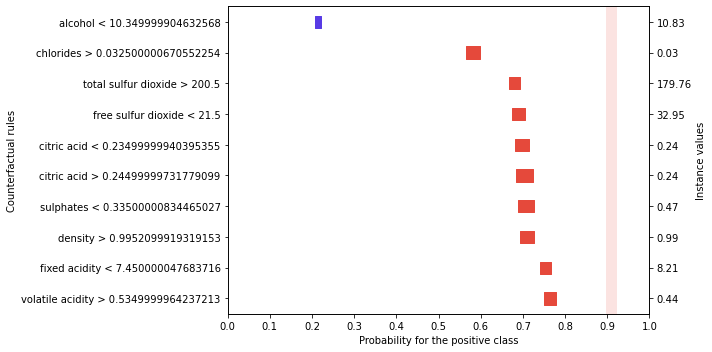

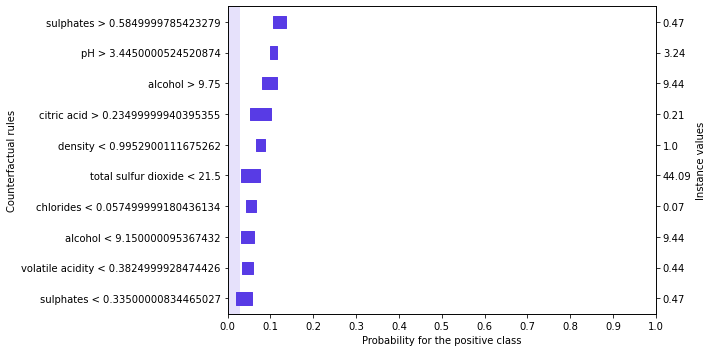

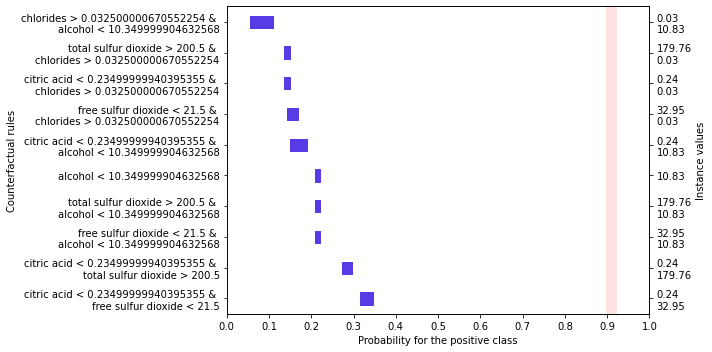

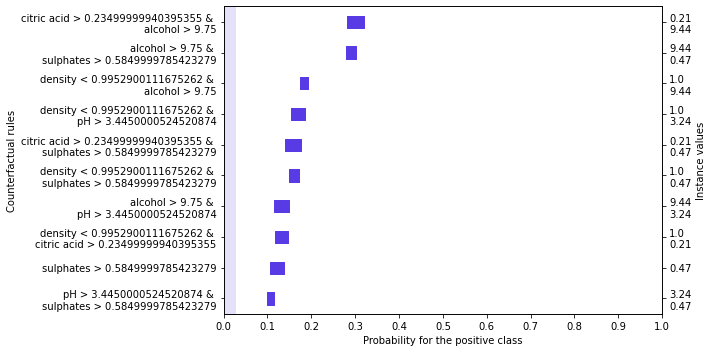

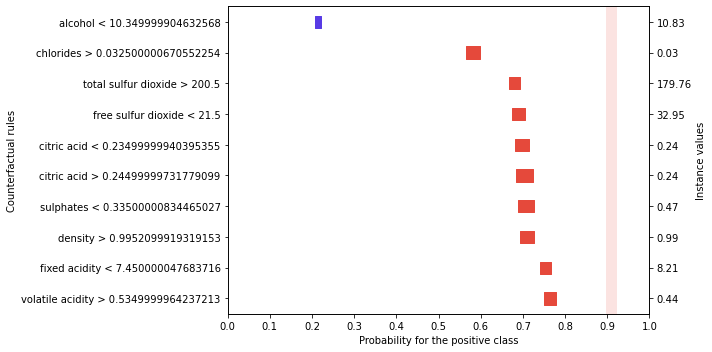

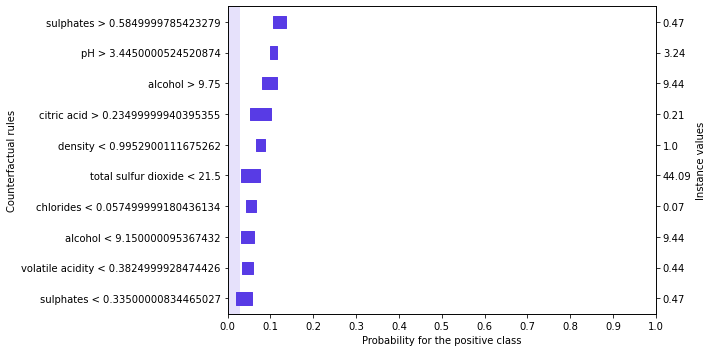

In [7]:
counterfactual_explanations.plot_counterfactuals()
counterfactual_explanations.add_conjunctive_counterfactual_rules().plot_counterfactuals()
counterfactual_explanations.remove_conjunctive_rules().plot_counterfactuals()

`calibrated_explanations` supports multiclass which is demonstrated in [demo_multiclass](https://github.com/Moffran/calibrated_explanations/blob/main/notebooks/demo_multiclass.ipynb). That notebook also demonstrates how both feature names and target and categorical labels can be added to improve the interpretability. 
## Regression
Extracting explanations for regression is very similar to how it is done for classification. First we load and divide the dataset.   

In [8]:
dataset = fetch_openml(name="house_sales", version=3)

X = dataset.data.values.astype(float)
y = dataset.target.values

feature_names = dataset.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1)

X_prop_train, X_cal, y_prop_train, y_cal = train_test_split(X_train, y_train,
                                                            test_size=0.25)

Let us now fit a `RandomForestRegressor` from
[sklearn](https://scikit-learn.org) to the proper training
set:

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_prop_train, y_prop_train)

RandomForestRegressor()

Define a `CalibratedExplainer` object using the new model and data. The `mode` parameter must be explicitly set to regression. By default, explanations based on a two-sided interval with 90% confidence are provided. 

In [10]:
explainer = CalibratedExplainer(rf, X_cal, y_cal, mode='regression', feature_names=feature_names)

factual_explanations = explainer.explain_factual(X_test)

Regression also offer both regular and uncertainty plots for factual explanations with or without conjunctive rules, in almost exactly the same way as for classification. 

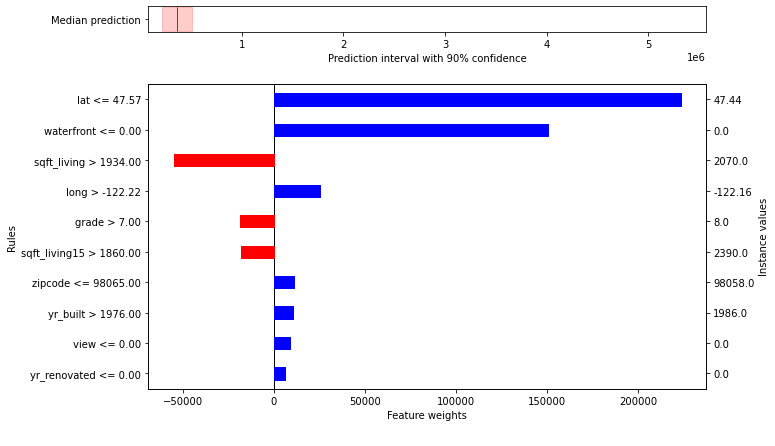

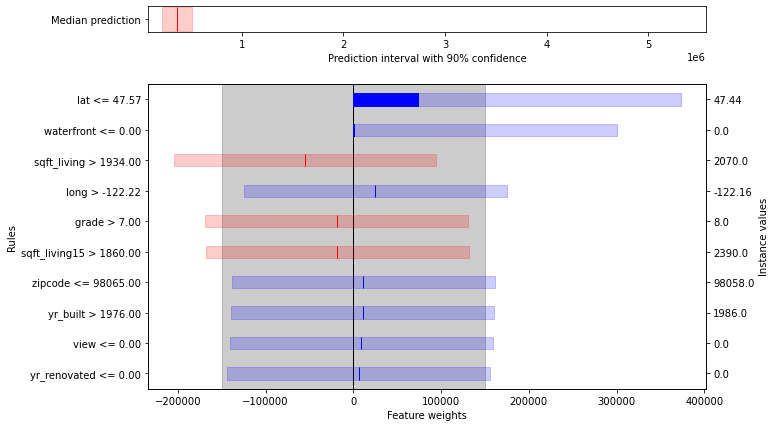

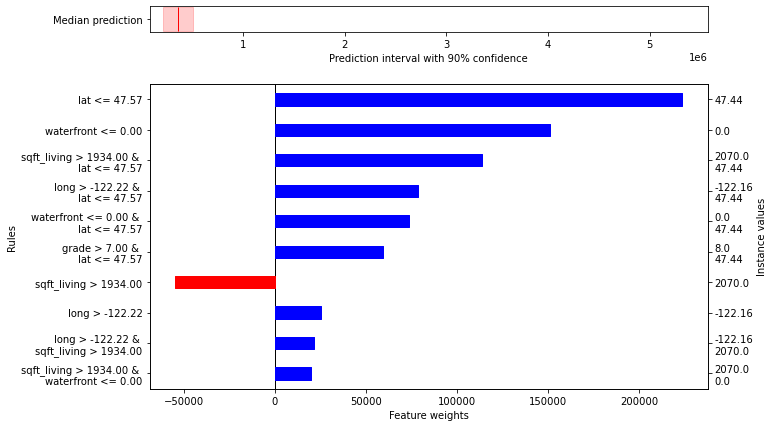

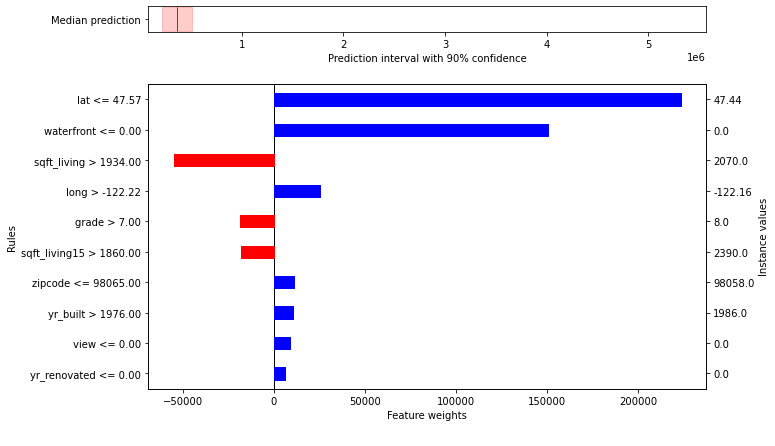

In [11]:
factual_explanations.plot_regular()
factual_explanations.plot_uncertainty()

factual_explanations.add_conjunctive_factual_rules().plot_regular()
factual_explanations.remove_conjunctive_rules().plot_regular()

The `explain_counterfactual` will work exactly the same as for classification. Otherwise, the discretizer must be set explicitly and the 'decile' discretizer is recommended. Counterfactual plots work as for classification.

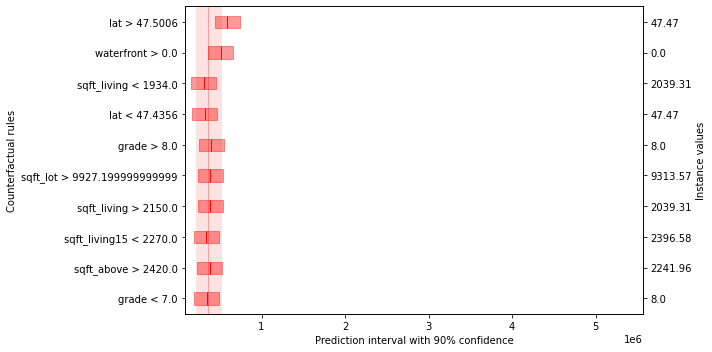

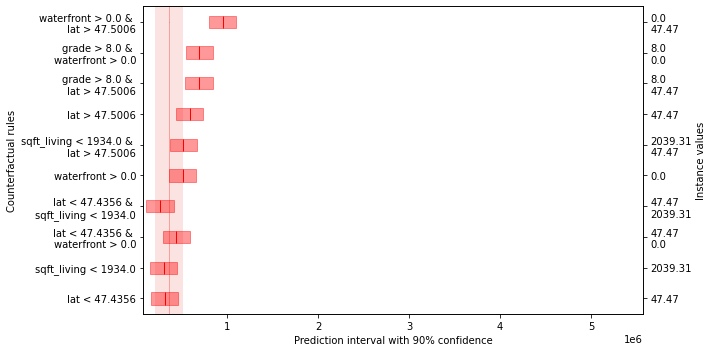

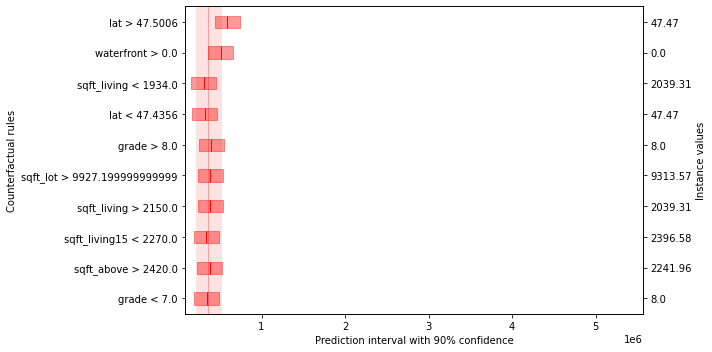

In [12]:
counterfactual_explanations = explainer.explain_counterfactual(X_test)

counterfactual_explanations.plot_counterfactuals()
counterfactual_explanations.add_conjunctive_counterfactual_rules().plot_counterfactuals()
counterfactual_explanations.remove_conjunctive_rules().plot_counterfactuals()

Regression offers many more options but to learn more about them, see the [demo_regression](https://github.com/Moffran/calibrated_explanations/blob/main/notebooks/demo_regression.ipynb) or the [demo_probabilistic_regression](https://github.com/Moffran/calibrated_explanations/blob/main/notebooks/demo_probabilistic_regression.ipynb) notebooks.